In [1]:
import pandas as pd

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 计算去重前的数据量
    before_dedup = len(df)

    # 去重
    df_dedup = df.drop_duplicates()

    # 计算去重后的数据量
    after_dedup = len(df_dedup)

    # 输出结果
    print("去重前的数据量:", before_dedup)
    print("去重后的数据量:", after_dedup)

    print("去重后的数据:")
    print(df_dedup)

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

去重前的数据量: 20358
去重后的数据量: 19779
去重后的数据:
       actor_id  label      login        id               node_id  \
0       1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1      13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2         22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3       7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4       2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   
...         ...    ...        ...       ...                   ...   
20344   8052756    Bot    tbreeds   8052756  MDQ6VXNlcjgwNTI3NTY=   
20345  34321341  Human     ssisil  34321341  MDQ6VXNlcjM0MzIxMzQx   
20346  15847407  Human   dbfannin  15847407  MDQ6VXNlcjE1ODQ3NDA3   
20347  94929125  Human    jambayk  94929125          U_kgDOBaiA5Q   
20348  18622487    Bot     G3rrus  18622487  MDQ6VXNlcjE4NjIyNDg3   

                                              avatar_url  gravatar_id  \
0      https://avatars.githubusercontent.com/u/108140...    

In [2]:
import pandas as pd

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 删除 'gravatar_id' 列
    df = df.drop(columns=['gravatar_id'])

    # 计算各列的缺失值数量
    missing_values = df.isnull().sum()

    # 输出结果
    print("各列缺失值数量:")
    print(missing_values)

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

各列缺失值数量:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [3]:
import pandas as pd

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 删除 'gravatar_id' 列
    df = df.drop(columns=['gravatar_id'])

    # 遍历每一列
    for col in df.columns:
        # 如果列的数据类型是 'object'（通常是字符串类型）
        if df[col].dtype == 'object':
            # 将列转换为字符串类型
            df[col] = df[col].astype(str)

            # 如果列中包含 'yes' 或 'no'（不区分大小写），将其映射为布尔值
            if df[col].str.lower().isin(['yes', 'no']).any():
                df[col] = df[col].str.lower().map({'yes': True, 'no': False})

            # 如果列中包含 1 或 0，将其映射为布尔值
            elif df[col].isin(['1', '0']).any():
                df[col] = df[col].map({'1': True, '0': False})

    # 填充缺失值为空字符串
    df = df.fillna('')

    # 计算各列的缺失值数量
    missing_values = df.isnull().sum()

    # 输出结果
    print("各列缺失值数量:")
    print(missing_values)

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

各列缺失值数量:
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


In [4]:
import pandas as pd

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 将 'created_at' 和 'updated_at' 列转换为 datetime 类型，错误处理为强制转换为 NaT
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

    # 将 datetime 转换为时间戳（以秒为单位）
    df['created_at_timestamp'] = df['created_at'].astype(int) / 10**9
    df['updated_at_timestamp'] = df['updated_at'].astype(int) / 10**9

    # 输出结果
    print(df[['created_at', 'created_at_timestamp', 'updated_at', 'updated_at_timestamp']])

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

                     created_at  created_at_timestamp  \
0     2011-09-26 17:27:03+00:00          1.317058e+09   
1     2015-06-29 10:12:46+00:00          1.435573e+09   
2     2008-08-29 16:20:03+00:00          1.220027e+09   
3     2014-05-20 18:43:09+00:00          1.400611e+09   
4     2012-08-16 14:19:13+00:00          1.345127e+09   
...                         ...                   ...   
20353 2014-07-02 23:27:34+00:00          1.404344e+09   
20354 2017-12-06 21:56:31+00:00          1.512597e+09   
20355 2015-11-14 14:44:05+00:00          1.447512e+09   
20356 2021-11-23 18:55:29+00:00          1.637694e+09   
20357 2016-04-22 22:11:59+00:00          1.461363e+09   

                     updated_at  updated_at_timestamp  
0     2023-10-13 11:21:10+00:00          1.697196e+09  
1     2023-10-07 06:26:14+00:00          1.696660e+09  
2     2023-10-02 02:11:21+00:00          1.696213e+09  
3     2023-10-12 12:54:59+00:00          1.697115e+09  
4     2023-10-06 11:58:41+00:00    

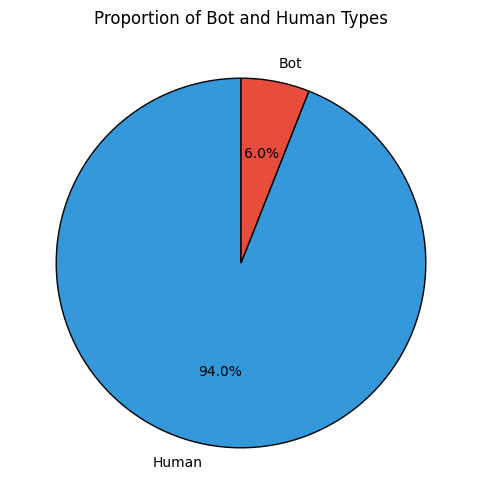

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 检查 'label' 列是否存在
    if 'label' not in df.columns:
        print("数据文件中缺少 'label' 列")
    else:
        # 计算 'label' 列中各类别的数量
        type_counts = df['label'].value_counts()

        # 绘制饼图
        plt.figure(figsize=(8, 6))
        type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90, wedgeprops={'edgecolor': 'black'})
        plt.title('Proportion of Bot and Human Types')
        plt.ylabel('')  # 隐藏 y 轴标签
        plt.show()

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_27192\3748557053.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_df['created_at'] = pd.to_datetime(bot_df['created_at'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_27192\3748557053.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_df['year'] = bot_df['created_at'].dt.year
C:\Users\DELL\AppData\Local\Temp\ipykernel_27192\3748557053.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

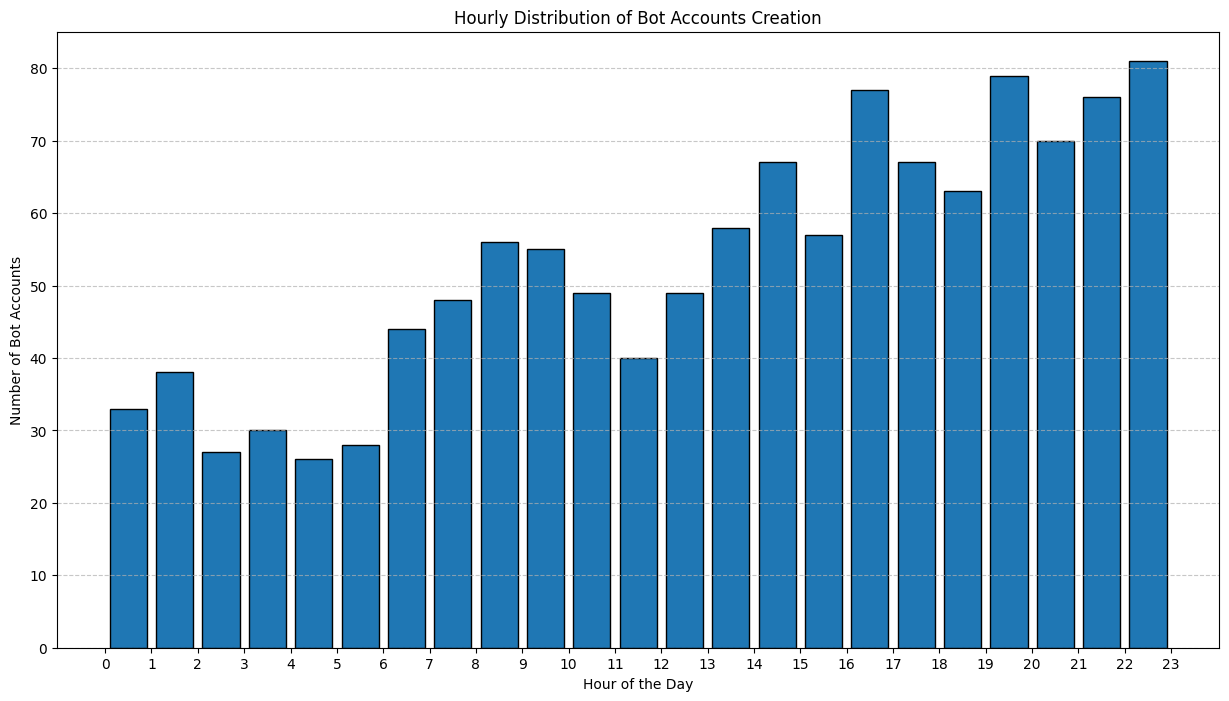

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 检查必要的列是否存在
    if 'label' not in df.columns or 'created_at' not in df.columns:
        print("数据文件中缺少 'label' 或 'created_at' 列")
    else:
        # 筛选出 Bot 账户
        bot_df = df[df['label'] == 'Bot']

        # 将 'created_at' 列转换为 datetime 类型
        bot_df['created_at'] = pd.to_datetime(bot_df['created_at'], errors='coerce')

        # 提取年份和小时
        bot_df['year'] = bot_df['created_at'].dt.year
        bot_df['hour'] = bot_df['created_at'].dt.hour

        # 绘制直方图
        plt.figure(figsize=(15, 8))
        plt.hist(bot_df['hour'].astype(int), bins=range(0, 24), edgecolor='black', rwidth=0.8)
        plt.title('Hourly Distribution of Bot Accounts Creation')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Bot Accounts')
        plt.xticks(range(0, 24))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_27192\3055342591.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['created_at'] = pd.to_datetime(human_df['created_at'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_27192\3055342591.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['year'] = human_df['created_at'].dt.year
C:\Users\DELL\AppData\Local\Temp\ipykernel_27192\3055342591.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

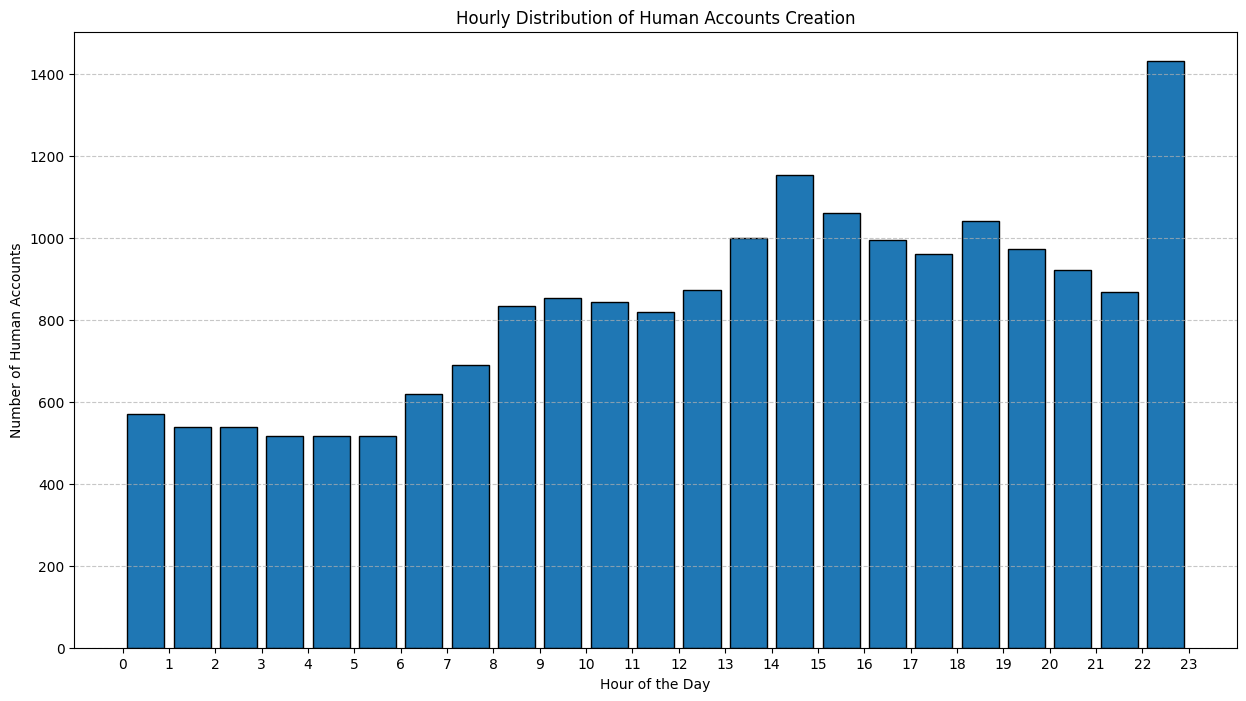

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 检查必要的列是否存在
    if 'label' not in df.columns or 'created_at' not in df.columns:
        print("数据文件中缺少 'label' 或 'created_at' 列")
    else:
        # 筛选出 Human 账户
        human_df = df[df['label'] == 'Human']

        # 将 'created_at' 列转换为 datetime 类型
        human_df['created_at'] = pd.to_datetime(human_df['created_at'], errors='coerce')

        # 提取年份和小时
        human_df['year'] = human_df['created_at'].dt.year
        human_df['hour'] = human_df['created_at'].dt.hour

        # 绘制直方图
        plt.figure(figsize=(15, 8))
        plt.hist(human_df['hour'].astype(int), bins=range(0, 24), edgecolor='black', rwidth=0.8)
        plt.title('Hourly Distribution of Human Accounts Creation')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Human Accounts')
        plt.xticks(range(0, 24))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

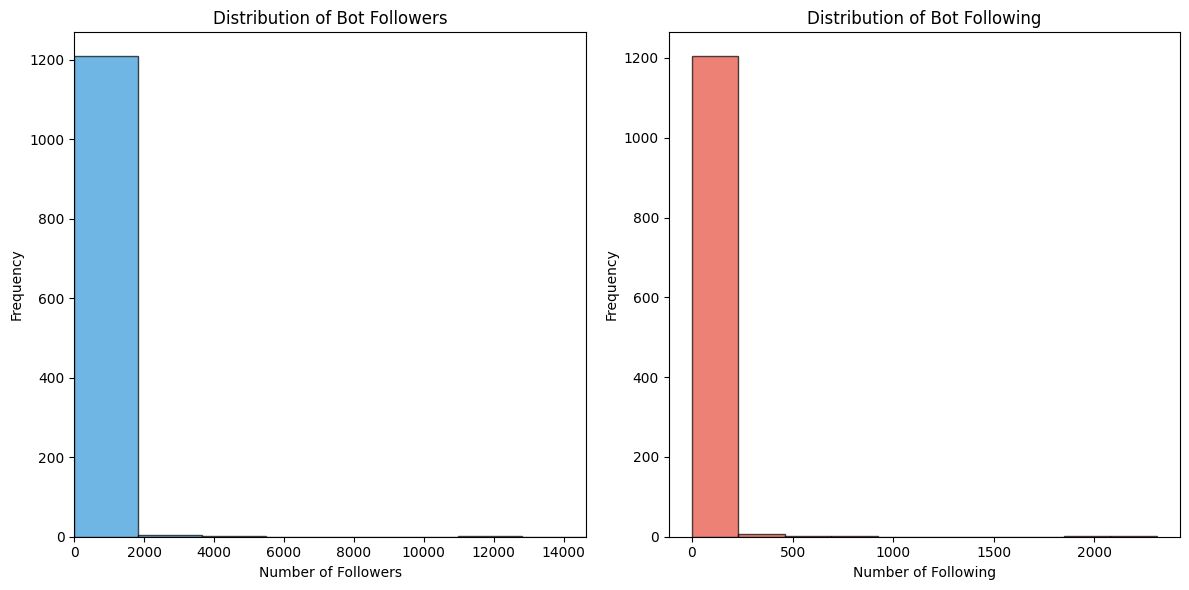

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 检查必要的列是否存在
    if 'label' not in df.columns or 'followers' not in df.columns or 'following' not in df.columns:
        print("数据文件中缺少 'label'、'followers' 或 'following' 列")
    else:
        # 筛选出 Bot 账户
        bot_df = df[df['label'] == 'Bot']

        # 创建图形
        plt.figure(figsize=(12, 6))

        # 绘制 Bot Followers 的直方图
        plt.subplot(1, 2, 1)
        plt.hist(bot_df['followers'], bins=10, color='#3498db', edgecolor='black', alpha=0.7)
        plt.title('Distribution of Bot Followers')
        plt.xlabel('Number of Followers')
        plt.ylabel('Frequency')
        plt.xlim(0, bot_df['followers'].max() * 0.8)  # 设置 x 轴范围

        # 绘制 Bot Following 的直方图
        plt.subplot(1, 2, 2)
        plt.hist(bot_df['following'], bins=10, color='#e74c3c', edgecolor='black', alpha=0.7)
        plt.title('Distribution of Bot Following')
        plt.xlabel('Number of Following')
        plt.ylabel('Frequency')

        # 调整布局
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")

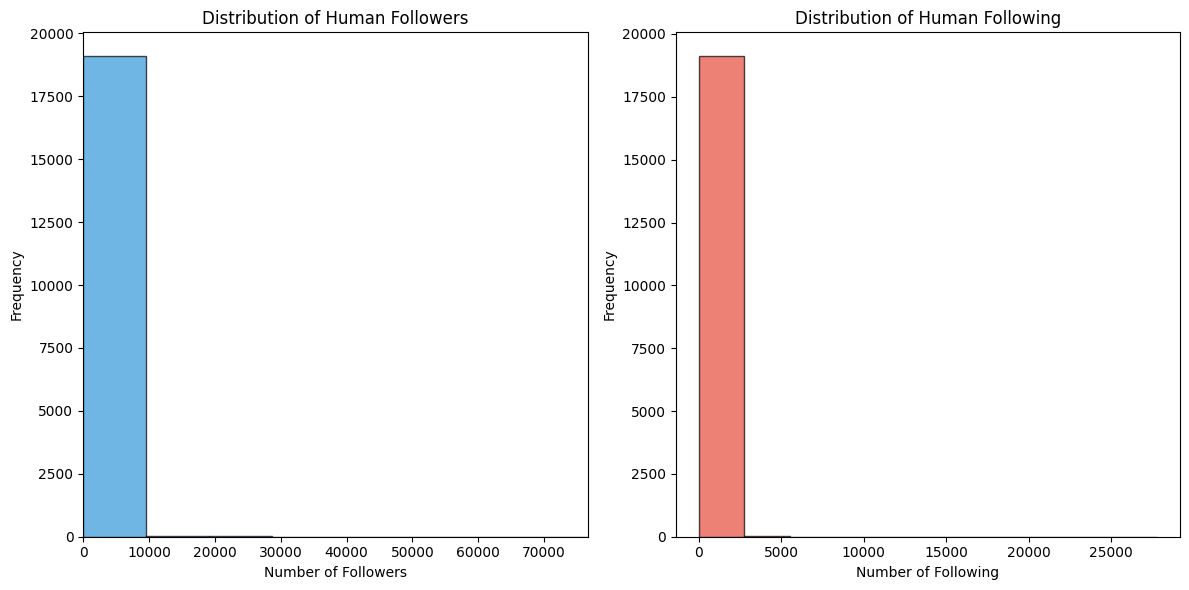

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
data_path = r"D:\DATA\github_bot_raw_data.csv"  # 使用原始字符串（raw string）避免转义问题

try:
    # 读取 CSV 文件
    df = pd.read_csv(data_path)

    # 检查必要的列是否存在
    if 'label' not in df.columns or 'followers' not in df.columns or 'following' not in df.columns:
        print("数据文件中缺少 'label'、'followers' 或 'following' 列")
    else:
        # 筛选出 Human 账户
        human_df = df[df['label'] == 'Human']

        # 创建图形
        plt.figure(figsize=(12, 6))

        # 绘制 Human Followers 的直方图
        plt.subplot(1, 2, 1)
        plt.hist(human_df['followers'], bins=10, color='#3498db', edgecolor='black', alpha=0.7)
        plt.title('Distribution of Human Followers')
        plt.xlabel('Number of Followers')
        plt.ylabel('Frequency')
        plt.xlim(0, human_df['followers'].max() * 0.8)  # 设置 x 轴范围

        # 绘制 Human Following 的直方图
        plt.subplot(1, 2, 2)
        plt.hist(human_df['following'], bins=10, color='#e74c3c', edgecolor='black', alpha=0.7)
        plt.title('Distribution of Human Following')
        plt.xlabel('Number of Following')
        plt.ylabel('Frequency')

        # 调整布局
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"文件未找到: {data_path}")
except Exception as e:
    print(f"读取文件时出错: {e}")